In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import statsmodels.api as sm
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score

In [2]:
# Função para remoção de outliers
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

# Case 3: Classificação

## 1. Empréstimo

Para este projeto, estaremos explorando dados disponíveis publicamente de LendingClub.com. Lending Club conecta pessoas que precisam de dinheiro (mutuários) com pessoas que têm dinheiro (investidores). Felizmente, como investidor, você gostaria de investir em pessoas que mostraram um perfil de ter uma alta probabilidade de pagá-lo de volta. Vamos tentar criar um modelo que ajude a prever isso.

O clube de empréstimo teve um ano muito interessante em 2016, então vamos verificar alguns de seus dados e ter em mente o contexto. Esses dados são de antes mesmo de serem públicos. Utilizaremos os dados de empréstimos de 2007-2010 e tentaremos classificar e prever se o mutuário pagou o empréstimo na íntegra.

Aqui estão o que as colunas representam:
* credit.policy: 1 se o cliente atender aos critérios de subscrição de crédito da LendingClub.com e 0 caso contrário.
* purpose: O objetivo do empréstimo (leva valores "credit_card", "debt_consolidation", "educacional", "grande compra", "small_business" e "all_other").
* int.rate: a taxa de juros do empréstimo (uma taxa de 11% seria armazenada como 0,11). Os mutuários julgados por LendingClub.com para serem mais arriscados recebem taxas de juros mais elevadas.
* installment: as parcelas mensais devidas pelo mutuário se o empréstimo for financiado.
* log.annual.inc: O log natural da renda anual auto-relatada do mutuário.
* dti: Ratio dívida / rendimento do tomador do empréstimo (montante da dívida dividido pela receita anual).
* fico: a pontuação de crédito FICO do mutuário.
* days.with.cr.line: O número de dias em que o mutuário teve uma linha de crédito.
* revol.bal: Saldo rotativo do mutuário (montante não pago no final do ciclo de cobrança do cartão de crédito).
* revol.util: taxa de utilização da linha rotativa do mutuário (o valor da linha de crédito usada em relação ao crédito total disponível).
* inq.last.6mths: número de consultas do mutuário por credores nos últimos 6 meses.
* delinq.2yrs: o número de vezes que o mutuário havia passado mais de 30 dias em um pagamento nos últimos 2 anos.
* pub.rec: O número de registros públicos depreciativos do mutuário (arquivamentos de falências, ônus fiscais ou julgamentos).
* `not.fully.paid`: Se o cliente pagou o empréstimo na íntegra. Nossa variável resposta.

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/5e9ae1dc-5f52-4ba4-a997-a1c1614d5e05.csv) para fazer o download do dataset.

In [3]:
df = pd.read_csv('LendingClub.csv', index_col=0)
df = df.reset_index()

### Análise exploratória

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.shape

(9578, 14)

In [6]:
y = df['not.fully.paid']
X = df.drop(['not.fully.paid', 'purpose'], axis=1)

### Regressão linear

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

lr.score(X_train, y_train)

0.0517004874229543

In [9]:
x = sm.add_constant(X_train)

model = sm.OLS(y_train, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         not.fully.paid   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     39.10
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           2.84e-90
Time:                        16:14:19   Log-Likelihood:                -3364.7
No. Observations:                8620   AIC:                             6755.
Df Residuals:                    8607   BIC:                             6847.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1190      0.169      6.618      0.000       0.788       1.450
credit.policy        -0.0573      0.013     -4.559      0.000      -0.082      -0.033
int.rate              0.7715      0.238      3.241      0.001       0.305       1.238
installment           0.0001   2.35e-05      4.810      0.000     6.7e-05       0.000
log.annual.inc       -0.0494      0.008     -6.344      0.000      -0.065      -0.034
dti                  -0.0012      0.001     -1.978      0.048      -0.002    -1.1e-05
fico                 -0.0007      0.000     -3.988      0.000      -0.001      -0.000
days.with.cr.line  8.777e-07   1.78e-06      0.494      0.621   -2.61e-06    4.36e-06
revol.bal           5.55e-07   1.44e-07      3.842      0.000    2.72e-07    8.38e-07
revol.util        -2.215e-05      0.000     -0.127      0.899      -0.000       0.000
inq.last.6mths        0.0149      0.002      7.115      0.000       0.011       0.019
delinq.2yrs          -0.0188      0.007     -2.504      0.012      -0.033      -0.004
pub.rec               0.0415      0.015      2.789      0.005       0.012       0.071
==============================================================================
Omnibus:                     2362.935   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4830.869
Skew:                           1.710   Prob(JB):                         0.00
Kurtosis:                       4.322   Cond. No.                     2.48e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.48e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model.resid.mean()

2.8340858114815595e-13

### Regressão logística

Dado que a variável resposta é uma variável binária

In [11]:
clf = LogisticRegression(max_iter = 500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X)
y_proba = clf.predict_proba(X_train)
clf.score(X_train, y_train)

0.8393271461716937

In [12]:
# Agora testando o score com as variáveis de teste
clf.score(X_test, y_test)

0.8455114822546973

#### Com variáveis descritivas

In [13]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [14]:
df_dummies

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


#### Modelo 1

In [15]:
y = df_dummies['not.fully.paid']
X = df_dummies.drop(['not.fully.paid'], axis=1)

In [16]:
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.1)

In [17]:
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, y_train)

y_proba1 = clf.predict_proba(X_train)

#Score com as variáveis de treino
clf.score(X_train, y_train)

0.8400232018561485

In [18]:
# Agora testando o score com as variáveis de teste
clf.score(X_test1, y_test1)

0.8392484342379958

In [19]:
y_pred1 = clf.predict(X_train)

y_pred1[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [20]:
y[:5].values

array([0, 0, 0, 0, 0], dtype=int64)

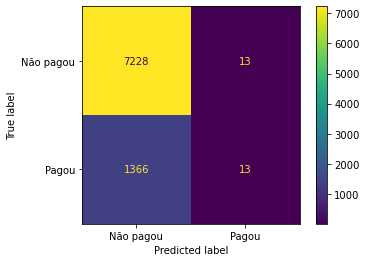

In [21]:
cm = confusion_matrix(y_train, y_pred1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [22]:
y_pred1 = clf.predict(X_test1)

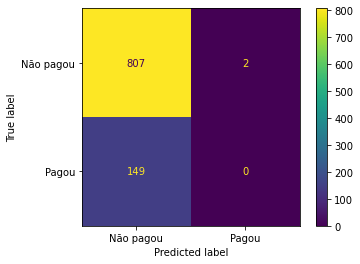

In [23]:
cm = confusion_matrix(y_test, y_pred1)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [24]:
# Quadrantes A, B, C e D
A = 8013
B = 32
C = 1511
D = 22

Evitar = B/(B+A)
Aceitar = D/(D + C)
print(f'Evitar: {Evitar*100}%')
print(f'Aceitar: {Aceitar*100}%')

Evitar: 0.3977625854568055%
Aceitar: 1.4350945857795172%


#### Modelo 2

In [25]:
pd.DataFrame(data=clf.coef_, columns=X.columns)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.123061,0.011466,0.00074,-0.042489,0.004652,-0.002484,-0.000029,0.000002,0.005611,0.10443,0.008181,0.055648,-0.096717,-0.088037,0.027341,0.019375,-0.025147,0.108963


Eliminando coeficientes baixos

In [26]:
X = df_dummies.drop(['not.fully.paid', 'days.with.cr.line'], axis=1)

In [27]:
X_train, X_test2, y_train, y_test2 = train_test_split(X, y, test_size=0.1)

In [28]:
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, y_train)

y_proba2 = clf.predict_proba(X_train)

#Score com as variáveis de treino
clf.score(X_train, y_train)

0.8394431554524362

In [29]:
# Agora testando o score com as variáveis de teste
clf.score(X_test2, y_test2)

0.8455114822546973

In [30]:
y_pred2 = clf.predict(X_train)

y_pred2[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [31]:
y[:5].values

array([0, 0, 0, 0, 0], dtype=int64)

In [32]:
pd.DataFrame(data=clf.coef_, columns=X.columns)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.01919,0.001133,0.000619,-0.000023,0.001328,-0.003412,0.000001,0.006383,0.114303,0.000642,0.004403,-0.008283,-0.00907,0.00169,0.002339,-0.001278,0.008709


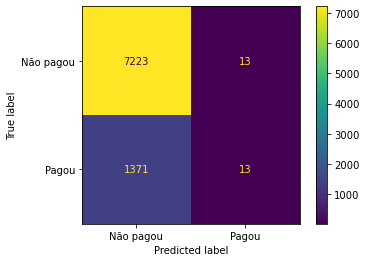

In [33]:
cm = confusion_matrix(y_train, y_pred2)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [34]:
y_pred2 = clf.predict(X_test2)

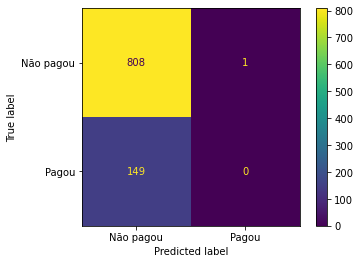

In [35]:
cm = confusion_matrix(y_test, y_pred2)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [36]:
# Quadrantes A, B, C e D
A = 8013
B = 32
C = 1511
D = 22

Evitar = B/(B+A)
Aceitar = D/(D + C)
print(f'Evitar: {Evitar*100}%')
print(f'Aceitar: {Aceitar*100}%')

Evitar: 0.3977625854568055%
Aceitar: 1.4350945857795172%


#### Modelo 3

In [37]:
X2 = X.drop(['revol.bal'], axis=1)

In [38]:
X_train, X_test3, y_train, y_test3 = train_test_split(X2, y, test_size=0.1)

In [39]:
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, y_train)

y_proba3 = clf.predict_proba(X_train)

#Score com as variáveis de treino
clf.score(X_train, y_train)

0.8377030162412993

In [40]:
# Agora testando o score com as variáveis de teste
clf.score(X_test3, y_test3)

0.8569937369519833

In [41]:
y_pred3 = clf.predict(X_train)

y_pred3[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [42]:
y[:5].values

array([0, 0, 0, 0, 0], dtype=int64)

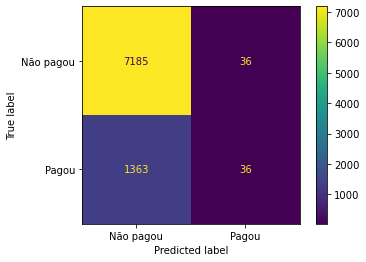

In [43]:
cm = confusion_matrix(y_train, y_pred3)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [44]:
y_pred3 = clf.predict(X_test3)

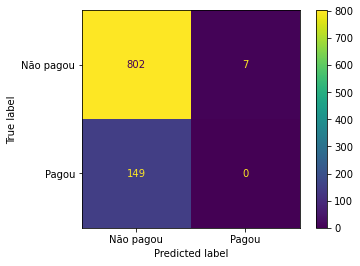

In [45]:
cm = confusion_matrix(y_test, y_pred3)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [46]:
# Quadrantes A, B, C e D
A = 8013
B = 32
C = 1511
D = 22

Evitar = B/(B+A)
Aceitar = D/(D + C)
print(f'Evitar: {Evitar*100}%')
print(f'Aceitar: {Aceitar*100}%')

Evitar: 0.3977625854568055%
Aceitar: 1.4350945857795172%


#### Modelo 4

Removendo mais coeficiente

In [47]:
pd.DataFrame(data=clf.coef_, columns=X2.columns)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.483281,0.640635,0.00091,-0.133096,0.005892,-0.002719,0.006907,0.093839,-0.036535,0.261425,-0.525357,-0.279425,0.177319,0.109121,-0.165947,0.559826


In [48]:
X2 = X2.drop(['dti'], axis=1)

In [49]:
X_train, X_test4, y_train, y_test4 = train_test_split(X2, y, test_size=0.1)

In [50]:
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, y_train)

y_proba4 = clf.predict_proba(X_train)
y_pred4 = clf.predict(X_train)

#Score com as variáveis de treino
clf.score(X_train, y_train)

0.8380510440835267

In [51]:
# Agora testando o score com as variáveis de teste
clf.score(X_test4, y_test4)

0.8517745302713987

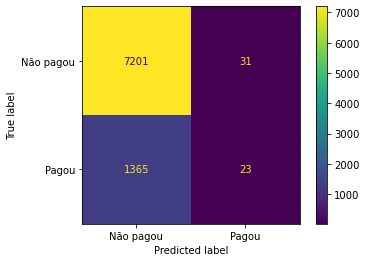

In [52]:
cm = confusion_matrix(y_train, y_pred4)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [53]:
y_pred4 = clf.predict(X_test4)

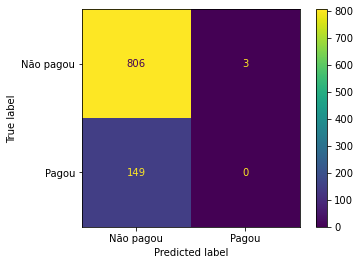

In [54]:
cm = confusion_matrix(y_test, y_pred4)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [55]:
# Quadrantes A, B, C e D
A = 8013
B = 32
C = 1511
D = 22

Evitar = B/(B+A)
Aceitar = D/(D + C)
print(f'Evitar: {Evitar*100}%')
print(f'Aceitar: {Aceitar*100}%')

Evitar: 0.3977625854568055%
Aceitar: 1.4350945857795172%


#### Modelo 5

In [56]:
pd.DataFrame(data=clf.coef_, columns=X2.columns)

,credit.policy,int.rate,installment,log.annual.inc,fico,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,-0.585111,0.091302,0.000771,-0.097022,-0.001409,0.007828,0.080139,-0.000305,0.252115,-0.484149,-0.273263,0.153074,0.069863,-0.155366,0.502826


In [57]:
X2 = X2.drop(['installment'], axis=1)

In [58]:
X_train, X_test5, y_train, y_test5 = train_test_split(X2, y, test_size=0.1)

In [59]:
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, y_train)

y_proba5 = clf.predict_proba(X_train)
y_pred5 = clf.predict(X_train)

#Score com as variáveis de treino
clf.score(X_train, y_train)

0.8394431554524362

In [60]:
# Agora testando o score com as variáveis de teste
clf.score(X_test5, y_test5)

0.8402922755741128

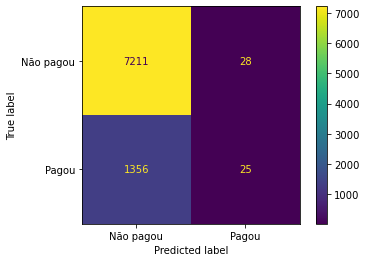

In [61]:
cm = confusion_matrix(y_train, y_pred5)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [62]:
y_pred5 = clf.predict(X_test5)

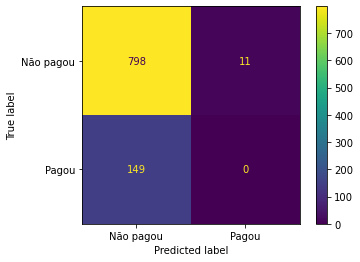

In [63]:
cm = confusion_matrix(y_test, y_pred5)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Não pagou', 'Pagou'])
cm_display.plot()
plt.grid(False)

In [64]:
# Quadrantes A, B, C e D
A = 8013
B = 32
C = 1511
D = 22

Evitar = B/(B+A)
Aceitar = D/(D + C)
print(f'Evitar: {Evitar*100}%')
print(f'Aceitar: {Aceitar*100}%')

Evitar: 0.3977625854568055%
Aceitar: 1.4350945857795172%


#### Gini

In [65]:
roc_auc_score(y_train, y_proba1[:, 1])*2 - 1

0.001281276823513755

In [66]:
roc_auc_score(y_train, y_proba2[:, 1])*2 - 1

0.015210573429645713

In [67]:
roc_auc_score(y_train, y_proba3[:, 1])*2 - 1

-0.0050699910843778895

In [68]:
roc_auc_score(y_train, y_proba4[:, 1])*2 - 1

-0.0076595526744415166

In [69]:
roc_auc_score(y_train, y_proba5[:, 1])*2 - 1

0.3329300147173284

> Melhor matriz de confusão: pred4, em que removemos os menores coeficientes até dti.

### Árvore de decisão

#### Modelo 1

In [70]:
y = df['not.fully.paid']
X = df.drop(['not.fully.paid', 'purpose'], axis=1)

tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, y)

y_proba = tree.predict_proba(X)
y_pred = tree.predict(X)

In [71]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [72]:
y[:5].values

array([0, 0, 0, 0, 0], dtype=int64)

In [73]:
accuracy_score(y, y_pred)

1.0

In [74]:
tree.feature_importances_

array([0.02540736, 0.11214732, 0.12689609, 0.12267253, 0.13561237,
       0.0698298 , 0.12584359, 0.11264052, 0.10957012, 0.04170512,
       0.01067544, 0.00699974])

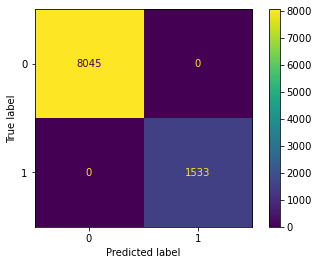

In [75]:
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.grid(False)

> Overfitting

#### Modelo 2

Próximo modelo

In [76]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [77]:
y = df['not.fully.paid']
X = df.drop(['not.fully.paid', 'purpose', 'credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line','revol.util', 'inq.last.6mths'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

tree = DecisionTreeClassifier(criterion='entropy', max_depth = 600)
tree.fit(X_train, y_train)

y_proba = tree.predict_proba(X_train)
y_pred = tree.predict(X_train)

In [78]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [79]:
y_test[:5].values

array([0, 0, 0, 0, 0], dtype=int64)

In [80]:
accuracy_score(y_train, y_pred)

0.9723897911832947

In [81]:
tree.feature_importances_

array([0.97644523, 0.01852625, 0.00502852])

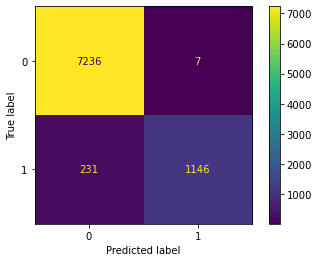

In [82]:
cm = confusion_matrix(y_train, y_pred)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.grid(False)

In [83]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7243
           1       0.99      0.83      0.91      1377

    accuracy                           0.97      8620
   macro avg       0.98      0.92      0.94      8620
weighted avg       0.97      0.97      0.97      8620



In [84]:
y_proba = tree.predict_proba(X_test)
y_pred = tree.predict(X_test)

In [85]:
accuracy_score(y_test, y_pred)

0.7296450939457203

In [86]:
tree.feature_importances_

array([0.97644523, 0.01852625, 0.00502852])

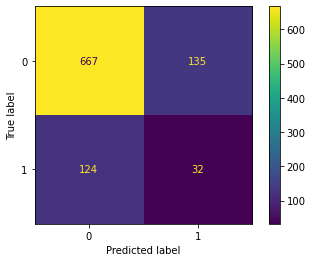

In [87]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.grid(False)

#### Random Forest

Com base no modelo 2 acima, criarei um modelo de random forest

In [88]:
rfc = RandomForestClassifier(random_state=9, criterion='entropy', max_depth = 600)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

roc_auc_score(y_test, y_pred)

0.5208932796214591

### Conclusão

> O melhor modelo obtido com Regressão logística, utilizando get_dummies para considerar variáveis descritivas e descartando o número de dias em que o mutuário teve uma linha de crédito (``days.with.cr.line``), assim como Saldo rotativo do mutuário (``revol.bal``). O modelo em questão, pred3, tem uma probabilidade estimada de 0,51% de classificar um não pagador erroneamente, e de 2,7% de classificar um pagador corretamente. Embora seja uma probabilidade pequena de classificar corretamente um pagador, a chance de classificar um não pagador erroneamente é extremamente baixa (situação que deve ser evitada). Dada a classificação Gini, o modelo é quase aceitável, vairando entre ser aleatório e um pouco acertivo.

> Já o último modelo com ávore de decisão, tentei diminuir o overfitting dela ao máximo. Embora fazendo os testes com os dados de treino, principalmente pela matriz de confusão, o resultado seja aparentemente satisfatório, usando os dados de teste tivemos muitos falsos positivos e falsos negativos (o que ainda indica overfitting). 

>Com o RandomForest, obtivemos um resultado com score muito baixo.

> Entendendo que, no estudo em questão, temos que evitar os cenários de falsos positivos, eu escolheria o modelo 3 da regressão logística.

## 2. Jogadores de Basquete

Imagine que você é um ténico e, por isso, deseja criar um modelo capaz de prever se, de acordo com um conjunto de característica de um jogador, ele vai ser capaz de ter ou não uma carreira de 5 anos ou mais. Para isso, você dispõe de um dataset ([clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/5282bfa7-cbb8-4bf2-9537-6e7c237daf39.csv) para o download) que contém informações passadas de jogadores, bem como a informação como essa informação do seu tempo de carrreira. Cada observação representa um jogador e cada coluna uma característica de desempenho. A coluna `target_5y` define se o jogador teve uma carreira profissional inferior a 5 anos [0], ou se teve uma carreira de 5 anos ou mais [1].

Utilize o conjunto de dados para criar um modelo que seja capaz de prever se um outro jogador ([clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/2d3db466-9a44-4b33-964c-1598457d2a85.csv) para fazer o download dos dados deste jogador), que você está interessado em contratar, vai ter uma carreira igual ou superior a 5 anos. Qual seria a probabilidade disso acontecer?

In [89]:
jogadores = pd.read_csv('jogadores.csv', index_col=0)
jogadores = jogadores.reset_index()

In [90]:
jogadores.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [91]:
jogador = pd.read_csv('outroJogador.csv', index_col=0)
jogador = jogador.reset_index()

In [92]:
jogador.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,80,31.4,14.3,5.9,11.1,52.5,0.0,0.1,11.1,2.6,3.9,65.4,3.0,5.0,8.0,2.4,1.1,0.8,2.2


In [93]:
jogadores.shape

(1329, 20)

### Regressão logística

Dado que a variável resposta é uma variável binária

In [94]:
y = jogadores['target_5y']
X = jogadores.drop(['target_5y'], axis=1)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [96]:
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X)
y_proba = clf.predict_proba(X_train)
clf.score(X_train, y_train)

0.7115384615384616

In [97]:
# Agora testando o score com as variáveis de teste
clf.score(X_test, y_test)

0.7443609022556391

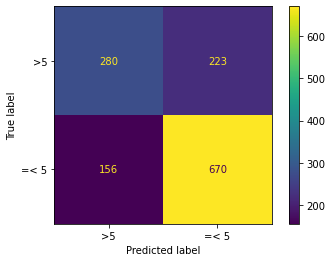

In [98]:
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['>5', '=< 5'])
cm_display.plot()
plt.grid(False)

In [99]:
pd.DataFrame(data=clf.coef_, columns=X.columns)

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,0.037233,-0.060598,0.431181,-0.185708,-0.223977,-0.013622,1.149648,-0.462441,0.001255,0.253041,-0.378793,0.000269,0.466523,-0.515369,0.410832,0.301702,-0.057011,0.482482,-0.249173


Eliminando coeficientes, visando aumentar a especificidade da matriz de confusão

In [100]:
X2 = X.drop(['points per game', 'field goals made', 'field goal percent', '3 point made', '3 point attempt', '3 point %'], axis=1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.1)

In [102]:
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, y_train)

y_proba2 = clf.predict_proba(X2)

#Score com as variáveis de treino
clf.score(X_train, y_train)

0.7157190635451505

In [103]:
# Agora testando o score com as variáveis de teste
clf.score(X_test, y_test)

0.706766917293233

In [104]:
y_pred = clf.predict(X2)

y_pred[:5]

array([0, 0, 1, 1, 1], dtype=int64)

In [105]:
y[:5].values

array([0, 0, 0, 1, 1], dtype=int64)

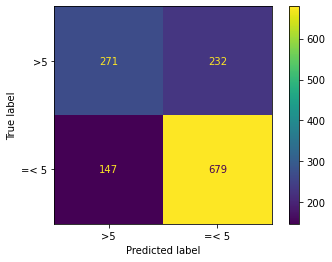

In [106]:
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['>5', '=< 5'])
cm_display.plot()
plt.grid(False)

In [107]:
pd.DataFrame(data=clf.coef_, columns=X2.columns)

,games played,minutes played,field goal attempts,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,0.037646,-0.042125,0.080211,0.761397,-0.425112,-0.000847,0.588391,-0.336408,0.202149,0.243232,-0.025813,0.592067,-0.288049


In [108]:
roc_auc_score(y, y_proba2[:, 1])

0.7633460736789914

> Tentei selecionar as colunas do dataframe de forma a aumentar a especificidade, considerando Falso Positivo como o caso que temos que evitar

> Dado o ROC AUC, o modelo é aceitável

### Probabilidade de ter uma carreira com mais de 5 anos

In [109]:
pd.DataFrame(data=clf.coef_, columns=X2.columns)

,games played,minutes played,field goal attempts,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,0.037646,-0.042125,0.080211,0.761397,-0.425112,-0.000847,0.588391,-0.336408,0.202149,0.243232,-0.025813,0.592067,-0.288049


In [110]:
jogador.head()

,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,80,31.4,14.3,5.9,11.1,52.5,0.0,0.1,11.1,2.6,3.9,65.4,3.0,5.0,8.0,2.4,1.1,0.8,2.2


In [111]:
odds = pd.DataFrame(data=clf.coef_, columns=X2.columns) * jogador
odds = odds.fillna(0)
odds = odds.sum(1)
odds = odds[0]
odds

4.941202377490906

In [112]:
prob = odds/(odds + 1)
print(f'Probabilidade de carreira com mais de 5 anos: {prob*100.:2f}%')

Probabilidade de carreira com mais de 5 anos: 83.168390%


## 3. Prevendo campanha de investimento no Banco

Você possui dados de campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em ligações telefônicas. Muitas vezes, era necessário mais de um contato para o mesmo cliente, para verificar se o possível cliente aceitaria ('sim') ou não ('não') se inscrever em um programa de depósito bancário a prazo (algo como um investimento em CDB).


O objetivo da classificação é prever se o cliente irá se inscrever (yes/no) nesse investimento (variável `y`).

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/5febb4d1-a2c5-4cc6-b72a-81c72ca67ffe.csv) para fazer o download do dataset.

In [113]:
banco = pd.read_csv('banco.csv', index_col=0, delimiter = ';')
banco = banco.reset_index()

In [114]:
banco.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [115]:
banco.shape

(45211, 17)

### Análise e remoção de outliers

In [116]:
X = banco.drop(['y'], axis=1)

<AxesSubplot:>

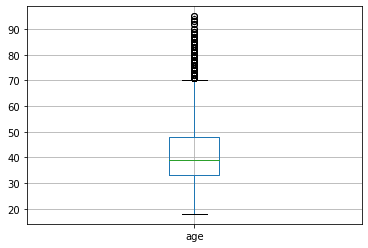

In [117]:
X[['age']].boxplot()

<AxesSubplot:>

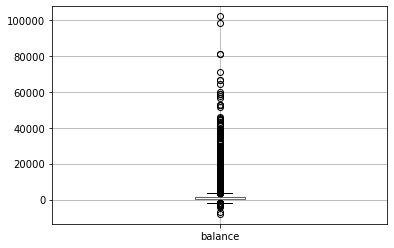

In [118]:
X[['balance']].boxplot()

<AxesSubplot:>

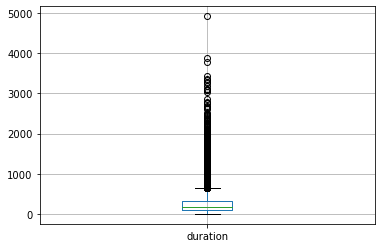

In [119]:
X[['duration']].boxplot()

In [120]:
lista_colunas = ['age', 'balance', 'duration']

In [121]:
for coluna in lista_colunas:
    inf, sup = calc_min_and_max_range(banco[coluna])
    
    banco = banco[(banco[coluna] >= inf) & (banco[coluna] <= sup)]

### Regressão logística

In [122]:
banco_dummies = pd.get_dummies(banco, drop_first=True)

In [123]:
y = banco_dummies['y_yes']
X = banco_dummies.drop(['y_yes'], axis=1)

#### Modelo 1

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [125]:
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
y_proba = clf.predict_proba(X_train)
clf.score(X_train, y_train)

0.9330940631075221

In [126]:
# Agora testando o score com as variáveis de teste
clf.score(X_test, y_test)

0.9356662180349933

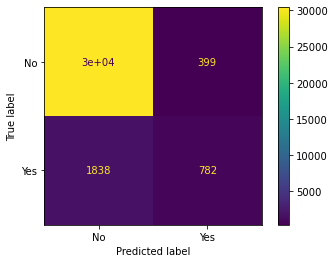

In [127]:
cm = confusion_matrix(y_train, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])
cm_display.plot()
plt.grid(False)

In [128]:
roc_auc_score(y_train, y_proba[:, 1])*2 - 1

0.8191470149983959

In [129]:
y_pred = clf.predict(X_test)

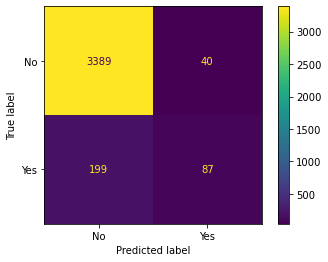

In [130]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['No', 'Yes'])
cm_display.plot()
plt.grid(False)

In [131]:
y_proba = clf.predict_proba(X_test)
roc_auc_score(y_test, y_proba[:, 1])*2 - 1

0.8232455791510909

### Árvore de decisão

#### Modelo 1

In [132]:
y = banco_dummies['y_yes']
X = banco_dummies.drop(['y_yes'], axis=1)

In [133]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, y)

y_proba = tree.predict_proba(X)
y_pred = tree.predict(X)

In [134]:
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=uint8)

In [135]:
y[:5].values

array([0, 0, 0, 0, 0], dtype=uint8)

In [136]:
accuracy_score(y, y_pred)

1.0

In [137]:
tree.feature_importances_

array([0.09291328, 0.09726804, 0.08738234, 0.21350392, 0.03290864,
       0.05612925, 0.01538267, 0.00597273, 0.00306113, 0.00086534,
       0.00966202, 0.00201388, 0.00237478, 0.00388241, 0.0043253 ,
       0.00552955, 0.00209043, 0.00082075, 0.00848965, 0.00850705,
       0.00826213, 0.00572307, 0.0051216 , 0.0017861 , 0.02291457,
       0.01265578, 0.00584356, 0.03972116, 0.0168846 , 0.00257576,
       0.00881634, 0.00721391, 0.01515867, 0.01219019, 0.0205458 ,
       0.012069  , 0.0097454 , 0.01133174, 0.00867896, 0.00351087,
       0.11434842, 0.00181922])

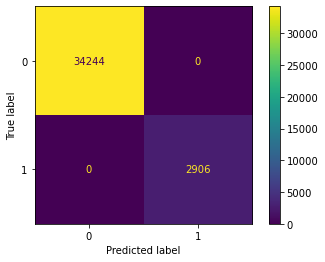

In [138]:
cm = confusion_matrix(y, y_pred)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.grid(False)

> Overfitting

#### Modelo 2

Próximo modelo

In [139]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [140]:
y = banco_dummies['y_yes']
X = banco_dummies.drop(['y_yes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

tree = DecisionTreeClassifier(criterion='entropy', max_depth = 20)
tree.fit(X_train, y_train)

y_proba = tree.predict_proba(X_train)
y_pred = tree.predict(X_train)

In [141]:
y_pred[:5]

array([1, 0, 0, 0, 0], dtype=uint8)

In [142]:
y_test[:5].values

array([0, 0, 0, 0, 0], dtype=uint8)

In [143]:
accuracy_score(y_train, y_pred)

0.9858830566771347

In [144]:
tree.feature_importances_

array([0.08123081, 0.08524931, 0.08316594, 0.22748891, 0.02491787,
       0.06096329, 0.01590705, 0.00557015, 0.00181111, 0.00070969,
       0.00919158, 0.00284137, 0.00127861, 0.00515381, 0.00408284,
       0.00691969, 0.00150935, 0.00054505, 0.00876631, 0.00654948,
       0.00940246, 0.00662865, 0.00385863, 0.00107026, 0.02757263,
       0.01090987, 0.00350464, 0.04494038, 0.01700745, 0.00107246,
       0.00791475, 0.00906935, 0.01347071, 0.01390962, 0.02352748,
       0.00866302, 0.0096677 , 0.01181229, 0.00915429, 0.00229323,
       0.12928225, 0.00141565])

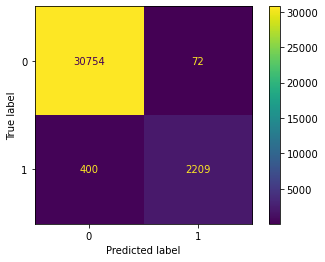

In [145]:
cm = confusion_matrix(y_train, y_pred)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.grid(False)

In [146]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     30826
           1       0.97      0.85      0.90      2609

    accuracy                           0.99     33435
   macro avg       0.98      0.92      0.95     33435
weighted avg       0.99      0.99      0.99     33435



In [147]:
y_proba = tree.predict_proba(X_test)
y_pred = tree.predict(X_test)

In [148]:
accuracy_score(y_test, y_pred)

0.9251682368775236

In [149]:
tree.feature_importances_

array([0.08123081, 0.08524931, 0.08316594, 0.22748891, 0.02491787,
       0.06096329, 0.01590705, 0.00557015, 0.00181111, 0.00070969,
       0.00919158, 0.00284137, 0.00127861, 0.00515381, 0.00408284,
       0.00691969, 0.00150935, 0.00054505, 0.00876631, 0.00654948,
       0.00940246, 0.00662865, 0.00385863, 0.00107026, 0.02757263,
       0.01090987, 0.00350464, 0.04494038, 0.01700745, 0.00107246,
       0.00791475, 0.00906935, 0.01347071, 0.01390962, 0.02352748,
       0.00866302, 0.0096677 , 0.01181229, 0.00915429, 0.00229323,
       0.12928225, 0.00141565])

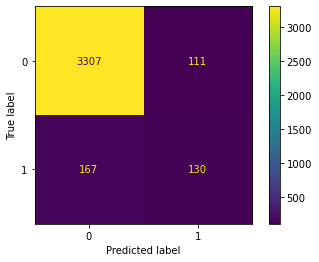

In [150]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.grid(False)

#### Random Forest

Com base no modelo 2 acima, criarei um modelo de random forest

In [151]:
rfc = RandomForestClassifier(random_state=13, criterion='entropy', max_depth = 20)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

roc_auc_score(y_test, y_pred)

0.646174540410936

#### Conclusão

> O melhor modelo obtido com Regressão logística, tratando os outliers, utilizando get_dummies para considerar variáveis descritivas. Embora seja uma probabilidade pequena de classificar corretamente um cliente, a chance de classificar um "falso cliente" erroneamente é extremamente baixa (situação que deve ser evitada). Dada a classificação Gini, o modelo é aceitável.

> Já o último modelo com ávore de decisão, tentei diminuir o overfitting dela ao máximo. Embora fazendo os testes com os dados de treino, principalmente pela matriz de confusão, o resultado seja aparentemente satisfatório, usando os dados de teste tivemos muitos falsos positivos e falsos negativos (o que ainda indica overfitting).

> Com o RandomForest, obtivemos um resultado com score baixo.

> Entendendo que, no estudo em questão, temos que evitar os cenários de falsos positivos, eu escolheria o modelo 1 da regressão logística.